# Import dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset using pandas library


In [9]:
sonar_data = pd.read_csv("/content/sonar.all-data.csv", header=None)

# Data Preprocessing

In [10]:
# print the name of all columns
print(sonar_data.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


In [11]:
# print first 5 rows of dataset
print(sonar_data.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [12]:
# print last 5 rows of dataset
print(sonar_data.tail())

         0       1       2       3       4       5       6       7       8   \
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
203  0.0193  0.0157   M  
204  0.0062  0.0

In [13]:
# checking the number of rows and columns
print(sonar_data.shape)

(208, 61)


In [14]:
# check the statistics of dataset
print(sonar_data.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

60
M    111
R     97
Name: count, dtype: int64


<ipython-input-15-29e5ccd0f0b4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=sonar_data[60], palette=['blue', 'green'])
<ipython-input-15-29e5ccd0f0b4>:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(x=sonar_data[60], palette=['blue', 'green'])


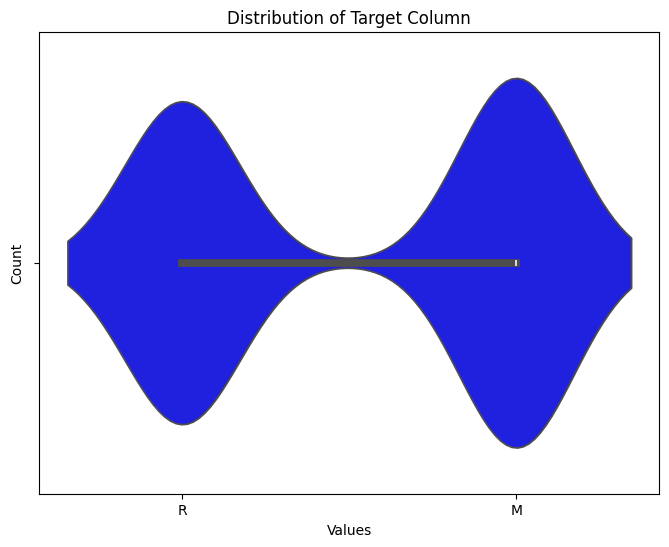

In [15]:
# count values of target column
print(sonar_data[60].value_counts())

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sonar_data is your pandas DataFrame
# Replace 'count' with the actual name of your target column if it's not 'count'

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=sonar_data[60], palette=['blue', 'green'])

# Customize the plot
plt.title('Distribution of Target Column')
plt.xlabel('Values')
plt.ylabel('Count')

# Show the plot
plt.show()


# In the following graph 0 and 1 are representing Rock and Mine respectively.

In [16]:
# check for missing values
print(sonar_data.isnull().sum().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64>


In [17]:
# check for duplicate values
print(sonar_data.drop_duplicates(inplace=True))

None


In [18]:
# transform target variables from chracter to numeric values
print(sonar_data[60].replace('R', 0, inplace=True))
print(sonar_data[60].replace('M', 1, inplace=True))

None
None


## Separating data into 2 categories x & y

In [19]:
x = sonar_data.drop(columns=[60])
y = sonar_data[60]
print(x)
print(y)


         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

# Feature scaling

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Splitting dataset into training and testing data

(208, 61)
(166, 60)
(42, 60)
(166,)
(42,)


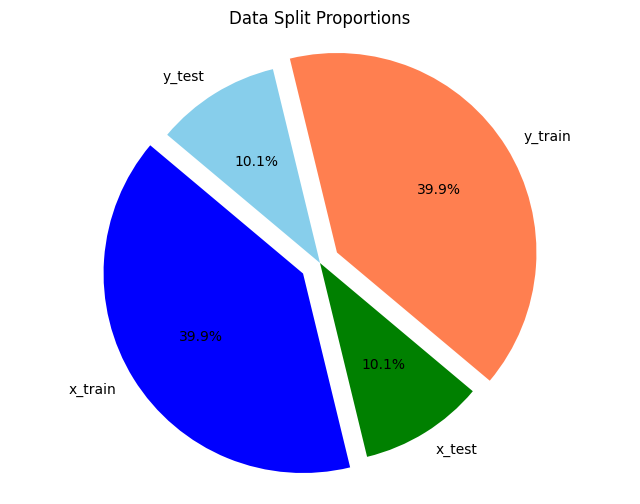

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
print(sonar_data.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Visulization
import matplotlib.pyplot as plt

# Define data splits
sizes = [166, 42, 166, 42]  # Update sizes according to your specific shapes
labels = ['x_train', 'x_test', 'y_train', 'y_test']
colors = ['blue', 'green', 'coral', 'skyblue']
explode = (0.1, 0, 0.1, 0)  # Explode the 1st and 3rd slices

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)

# Add title
plt.title('Data Split Proportions')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()




# Model Training with multiple algorithms

In [22]:
# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'liblinear']
}
model_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
model_lr.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'solver': ['lbfgs', 'liblinear']})

In [23]:
# Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}
model_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
model_rf.fit(x_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]})

In [24]:
# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
model_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
model_gb.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [25]:
# Support Vector Machine
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
model_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5)
model_svc.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [26]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model_lr.best_estimator_),
    ('rf', model_rf.best_estimator_),
    ('gb', model_gb.best_estimator_),
    ('svc', model_svc.best_estimator_)
], voting='soft')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, max_iter=1000)),
                             ('rf',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=200)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=200)),
                             ('svc', SVC(C=1, probability=True))],
                 voting='soft')

# Prediction

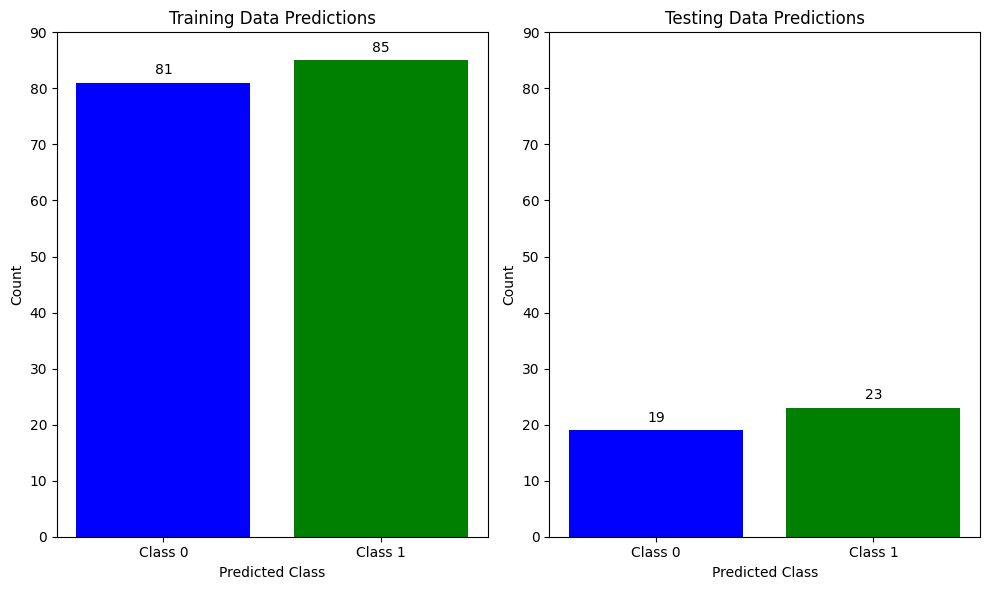

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Replace with your actual predictions
x_predict_train = np.array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                            1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
                            0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                            1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
                            1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

x_predict_test = np.array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
                           0, 0, 1, 0, 0])

# Calculate counts for each class in training and testing predictions
train_counts = np.bincount(x_predict_train)
test_counts = np.bincount(x_predict_test)

# Determine the maximum count to set y-axis limits
max_count = max(train_counts.max(), test_counts.max())

# Create bar plot for training predictions
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar([0, 1], train_counts, color=['blue', 'green'])
plt.title('Training Data Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Class 0', 'Class 1'])
plt.ylim([0, max_count + 5])  # Adjust ylim to add padding for labels

# Add counts above bars
for i, count in enumerate(train_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Create bar plot for testing predictions
plt.subplot(1, 2, 2)
plt.bar([0, 1], test_counts, color=['blue', 'green'])
plt.title('Testing Data Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Class 0', 'Class 1'])
plt.ylim([0, max_count + 5])  # Adjust ylim to add padding for labels

# Add counts above bars
for i, count in enumerate(test_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


# Accuracy measuring or Model Evaluation

In [28]:
# Measure training accuracy
train_acc = accuracy_score(x_predict_train, y_train)
print("Training Accuracy of model is : ", train_acc)

Training Accuracy of model is :  1.0


In [29]:
# Measure testing accuracy
test_acc = accuracy_score(x_predict_test, y_test)
print("Testing Accuracy of model is : ", test_acc)

Testing Accuracy of model is :  0.8809523809523809


In [30]:
# Measure overall accuracy of the model
accuracy = voting_clf.score(x_test, y_test)
print("Overall accuracy of model is : ", accuracy)

Overall accuracy of model is :  0.8809523809523809


# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Combine train and test data for confusion matrix
combined_x = np.vstack((x_train, x_test))
combined_y = pd.concat([y_train, y_test])

# Predict using Voting Classifier on combined data
combined_predictions = voting_clf.predict(combined_x)

# Compute confusion matrix
cm = confusion_matrix(combined_y, combined_predictions)

Heatmap for confusion matrix

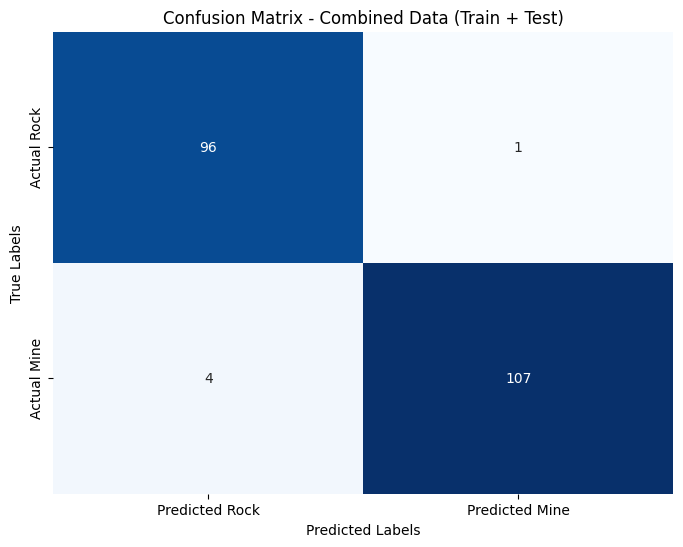

In [32]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Rock', 'Predicted Mine'],
            yticklabels=['Actual Rock', 'Actual Mine'])
plt.title('Confusion Matrix - Combined Data (Train + Test)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Histogram for confusion matrix

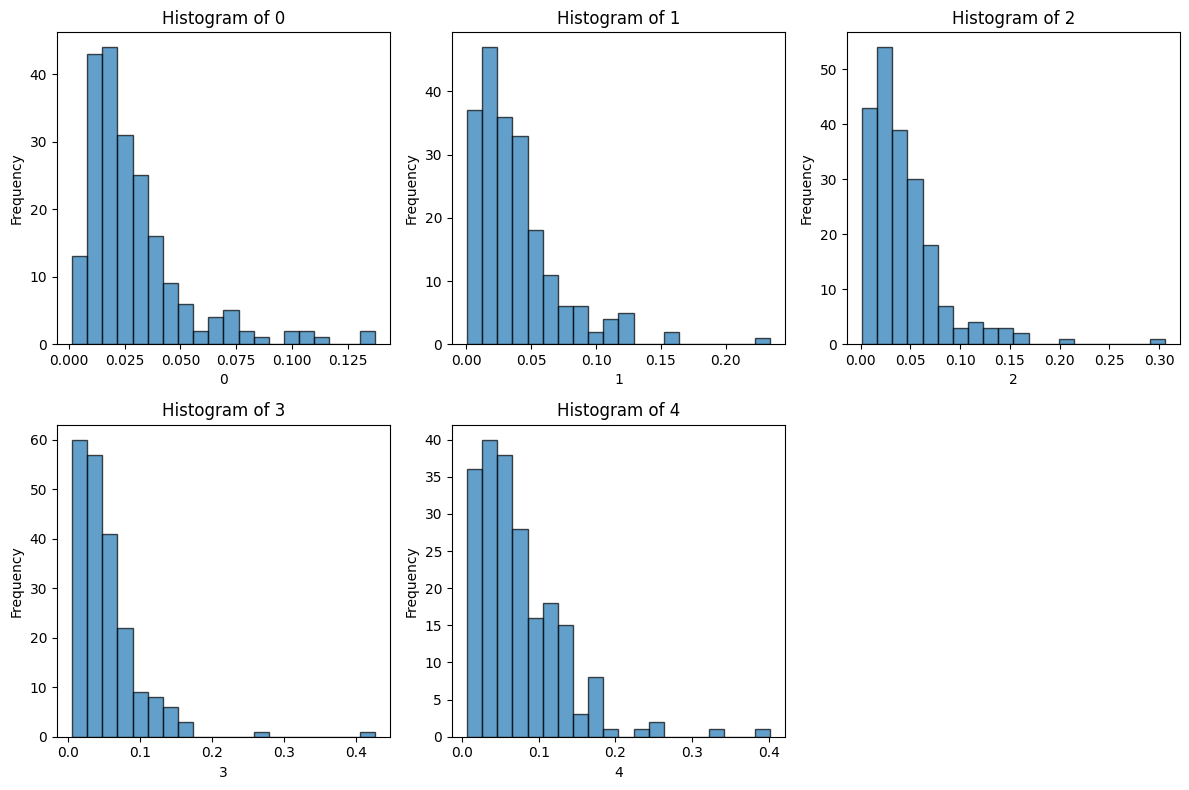

In [33]:
# Histogram
# Selecting some features for histogram (example: first 5 features)
selected_features = sonar_data.iloc[:, :5]

# Plotting histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_features.columns, start=1):
    plt.subplot(2, 3, i)
    plt.hist(selected_features[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Making a predictive system

In [34]:
input_data = (0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,0.0888,0.0500,0.0628,0.1274,0.0801,0.0742,0.2048,0.2950,0.3193,0.4567,0.5959,0.7101,0.8225,0.8425,0.9065,0.9802,1.0000,0.8752,0.7583,0.6616,0.5786,0.5128,0.4776,0.4994,0.5197,0.5071,0.4577,0.3505,0.1845,0.1890,0.1967,0.1041,0.0550,0.0492,0.0622,0.0505,0.0247,0.0219,0.0102,0.0047,0.0019,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058)
# Changing the input data into numpy array
np_array = np.asarray(input_data)
# Reshape the numpy array as we're predicting for one instance
array_reshaped = np_array.reshape(1, -1)
array_reshaped_scaled = scaler.transform(array_reshaped)
prediction = voting_clf.predict(array_reshaped_scaled)

print(prediction)
if prediction == 0:
    print("The object is a Rock!!")
else:
    print("The object is a Mine!!")

[0]
The object is a Rock!!
